# 轮廓：入门

### 目标

- 了解轮廓是什么。
- 学习查找轮廓，绘制轮廓等。
- 你将看到以下功能：**cv.findContours**()，**cv.drawContours**()

### 什么是轮廓?

轮廓可以简单地解释为连接具有相同颜色或强度的所有连续点（沿边界）的曲线。轮廓是用于形状分析以及对象检测和识别的有用工具。

- 为了获得更高的准确性，请使用二进制图像。因此，在找到轮廓之前，请应用阈值或canny边缘检测。
- 从OpenCV 3.2开始，**findContours**()不再修改源图像。
- 在OpenCV中，找到轮廓就像从黑色背景中找到白色物体。因此请记住，要找到的对象应该是白色，背景应该是黑色。

让我们看看如何找到二进制图像的轮廓： 

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/messi5.jpg')

imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)

contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

**findcontour**()函数中有三个参数，第一个是源图像，第二个是轮廓检索模式，第三个是轮廓逼近方法。输出等高线和层次结构。轮廓是图像中所有轮廓的Python列表。每个单独的轮廓是一个(x,y)坐标的Numpy数组的边界点的对象。

> **注意**
  稍后我们将详细讨论第二和第三个参数以及有关层次结构。在此之前，代码示例中赋予它们的值将适用于所有图像。

### 如何绘制轮廓?

要绘制轮廓，请使用**cv.drawContours**函数。只要有边界点，它也可以用来绘制任何形状。它的第一个参数是源图像，第二个参数是应该作为Python列表传递的轮廓，第三个参数是轮廓的索引（在绘制单个轮廓时有用。要绘制所有轮廓，请传递-1），其余参数是颜色，厚度等等

- 在图像中绘制所有轮廓：
  
  ```python
  cv.drawContours(img, contours, -1, (0,255,0), 3)
  ```

- 绘制单个轮廓，如第四个轮廓：
  ```python
  cv.drawContours(img, contours, 3, (0,255,0), 3) 
  ```

- 但是在大多数情况下，以下方法会很有用：
  ```python
  cnt = contours[4]
  cv.drawContours(img, [cnt], 0, (0,255,0), 3)
  ```

> **注意**
  最后两种方法相似，但是前进时，您会发现最后一种更有用。

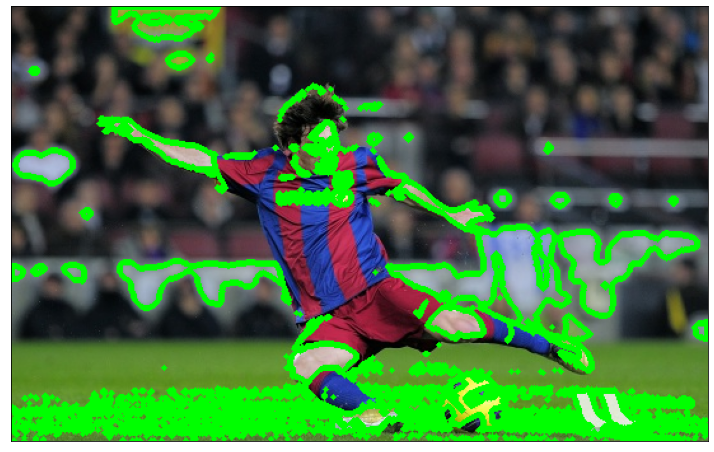

In [2]:
cv.drawContours(img, contours, -1, (0,255,0), 3)

plt.figure(figsize=(16, 8))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),
plt.xticks([]), plt.yticks([])

plt.show()

### 轮廓近似方法

这是**cv.findContours**函数中的第三个参数。它实际上表示什么？

上面我们告诉我们轮廓是强度相同的形状的边界。它存储形状边界的(x,y)坐标。但是它存储所有坐标吗？这是通过这种轮廓近似方法指定的。

如果传递**cv.CHAIN_APPROX_NONE**，则将存储所有边界点。但是实际上我们需要所有这些要点吗？例如，您找到了一条直线的轮廓。您是否需要线上的所有点来代表该线？不，我们只需要该线的两个端点即可。这就是**cv.CHAIN_APPROX_SIMPLE**所做的。它删除所有冗余点并压缩轮廓，从而节省内存。

下面的矩形图像演示了此技术。只需在轮廓数组中的所有坐标上绘制一个圆（以蓝色绘制）。第一幅图像显示了我用**cv.CHAIN_APPROX_NONE**获得的积分（734个点），第二幅图像显示了我用**cv.CHAIN_APPROX_SIMPLE**获得的效果（只有4个点）。看，它可以节省多少内存！！！

![](data/none.jpg)

### 附加资源

### 练习